In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
wine_data = pd.read_csv(r'D:\datascience__\end to end data sets-20230507T155014Z-001\end to end data sets\winequality-red.csv')

In [3]:
wine_data.shape

(1599, 12)

In [4]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Data Description:

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


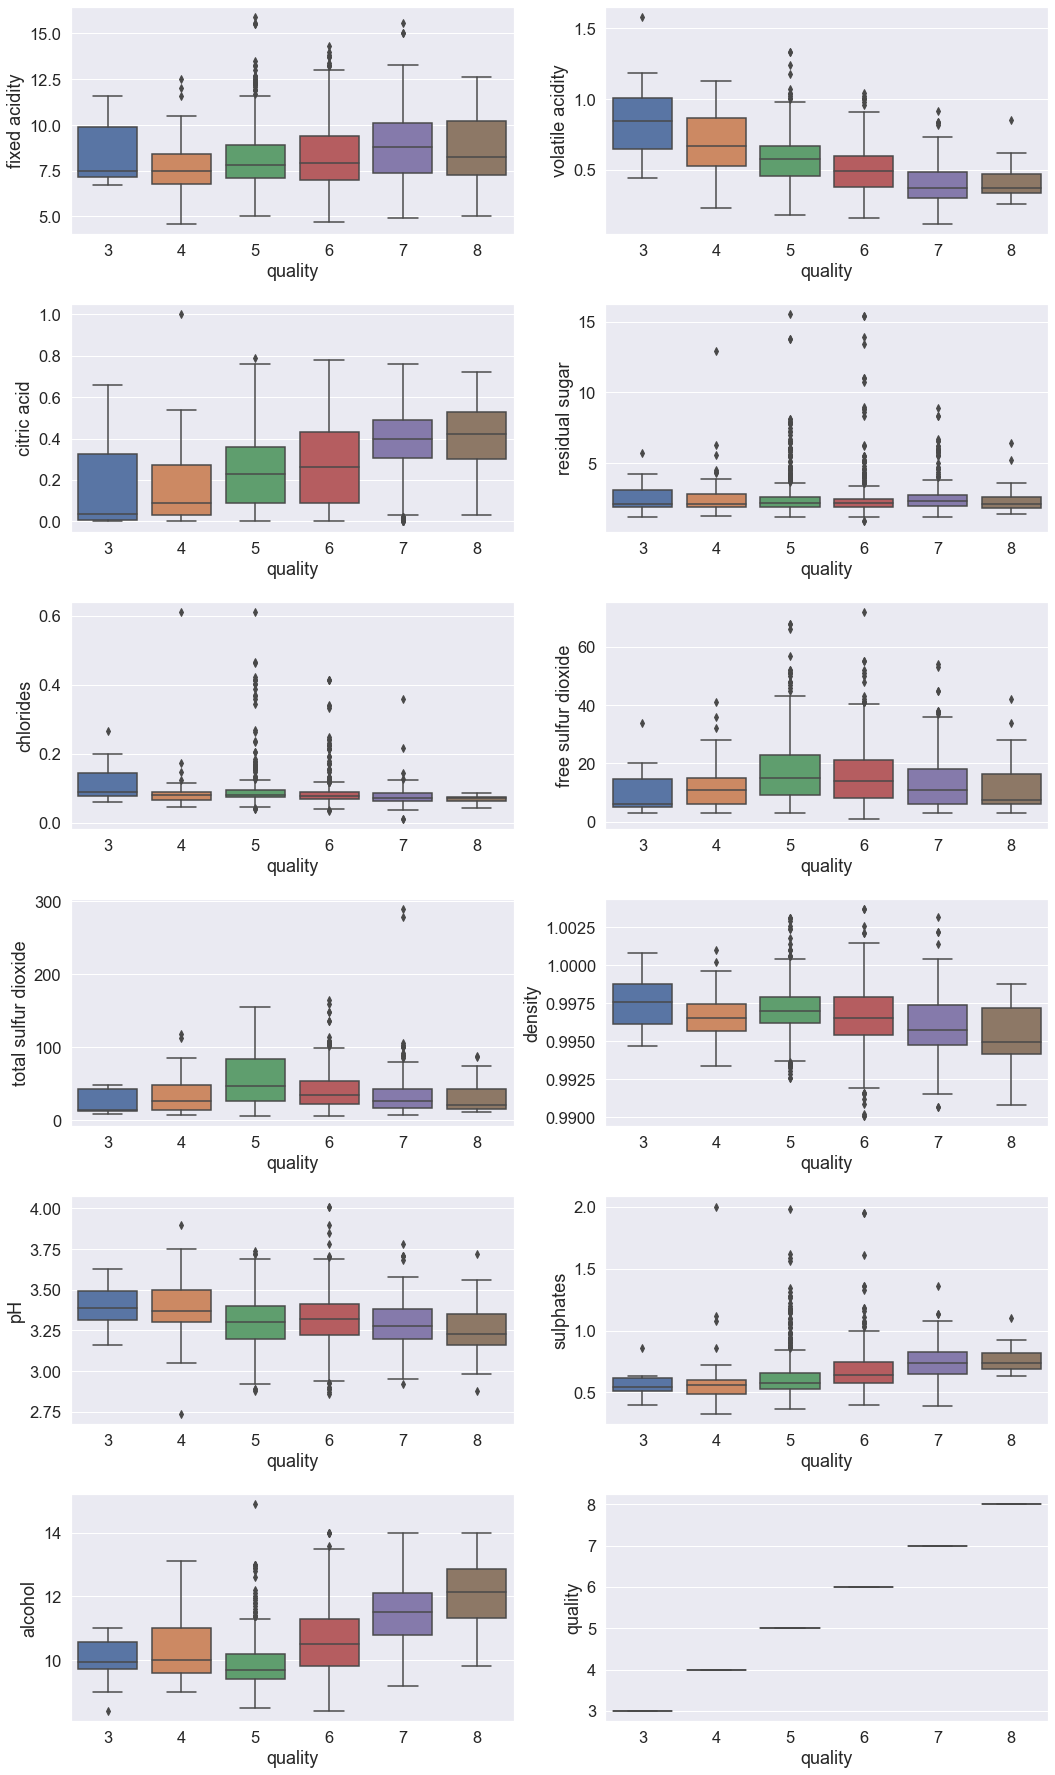

In [7]:
#Outlier Analysis
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(15,25))
i=1
for column in wine_data.columns:
    plt.subplot(6,2,i)
    sns.boxplot(x=wine_data['quality'], y=wine_data.loc[:,column])
    i=i+1
plt.tight_layout()
plt.show()

<Figure size 1800x1080 with 0 Axes>

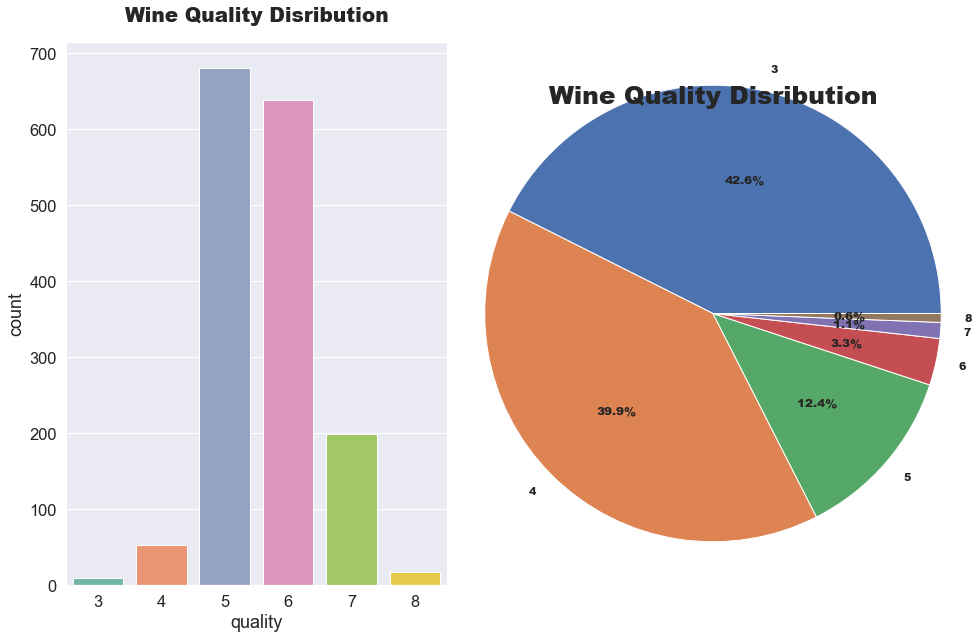

In [8]:
#Univariate Analysis of Target Variable
count = wine_data.quality.value_counts()
labels = '3', '4', '5', '6', '7', '8'

plt.figure(figsize=(25,15))
fig,ax = plt.subplots(figsize=(15,10))

plt.subplot(1,2,1)
sns.countplot(x ='quality', data=wine_data, palette="Set2")
plt.title("Wine Quality Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
sns.set(font_scale=1.0)
plt.pie(count.values, labels=labels, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"}, radius=1.5)
plt.title("Wine Quality Disribution",fontweight="black",size=25,pad=20)
plt.show()

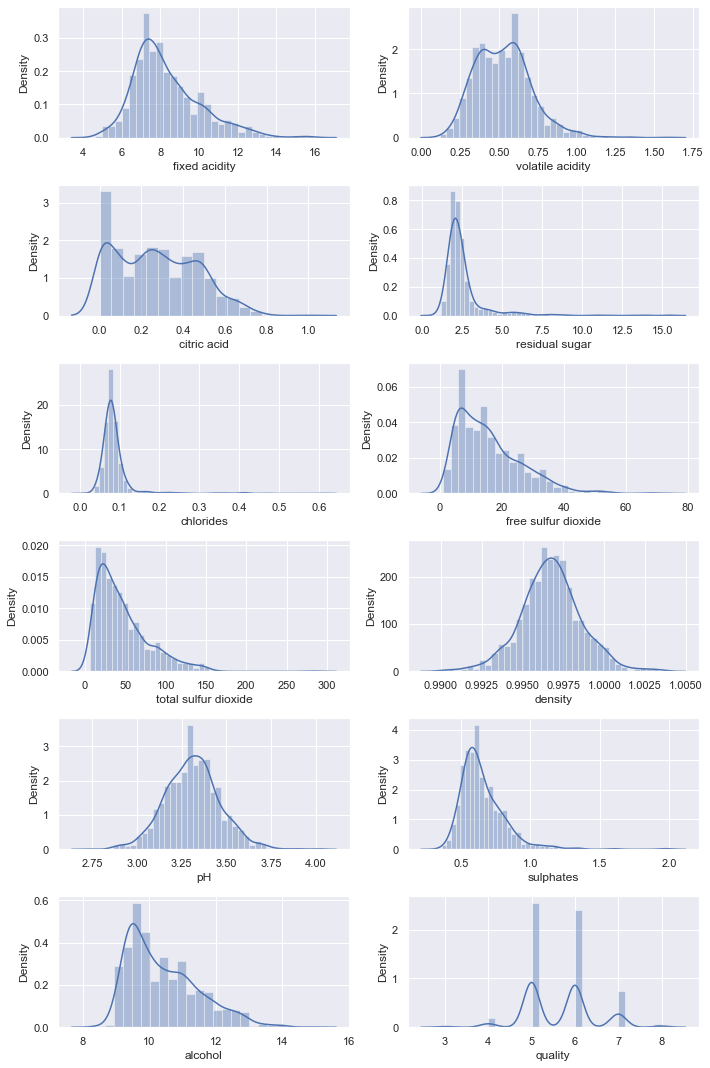

In [9]:
#Univariate Analysis of numerical features
sns.set()
fig = plt.figure(figsize=(10,15))
i=1
for col in wine_data.columns:
    plt.subplot(6,2,i)
    sns.distplot(wine_data[col])
    i=i+1
plt.tight_layout()
plt.show()

In [10]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


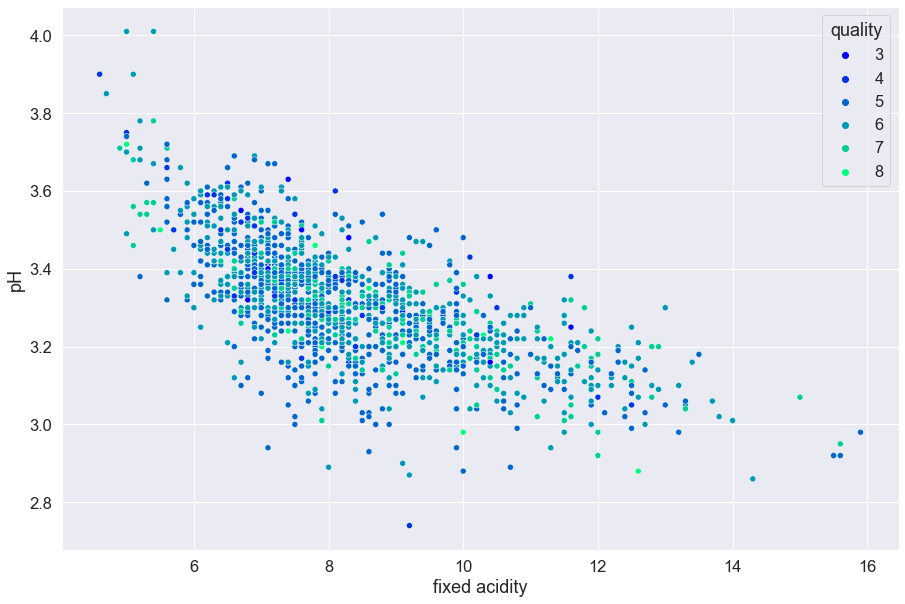

In [11]:
#Bivariate Relationship between 'fixed acidity' and  'chlorides'
sns.set_style("dark")
fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
p = sns.color_palette("winter", as_cmap=True)
sns.scatterplot(data = wine_data, x=wine_data['fixed acidity'], y=wine_data['pH'], hue= 'quality', palette=p)

plt.show()

<AxesSubplot:xlabel='fixed acidity', ylabel='citric acid'>

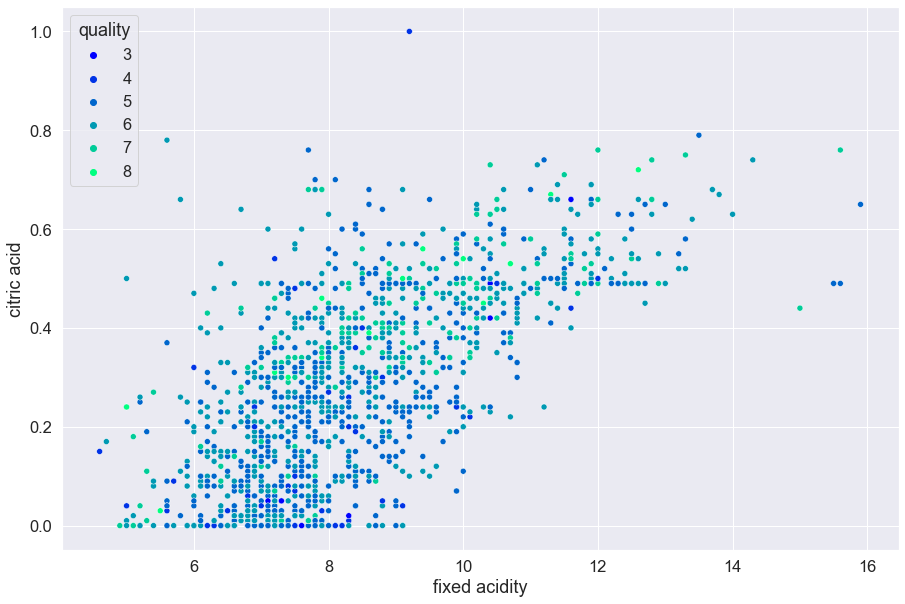

In [12]:
#Bivariate Relationship between 'fixed acidity' and 'citric acid'
fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.scatterplot(data = wine_data, x=wine_data['fixed acidity'], y=wine_data['citric acid'], hue= 'quality', palette='winter')

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

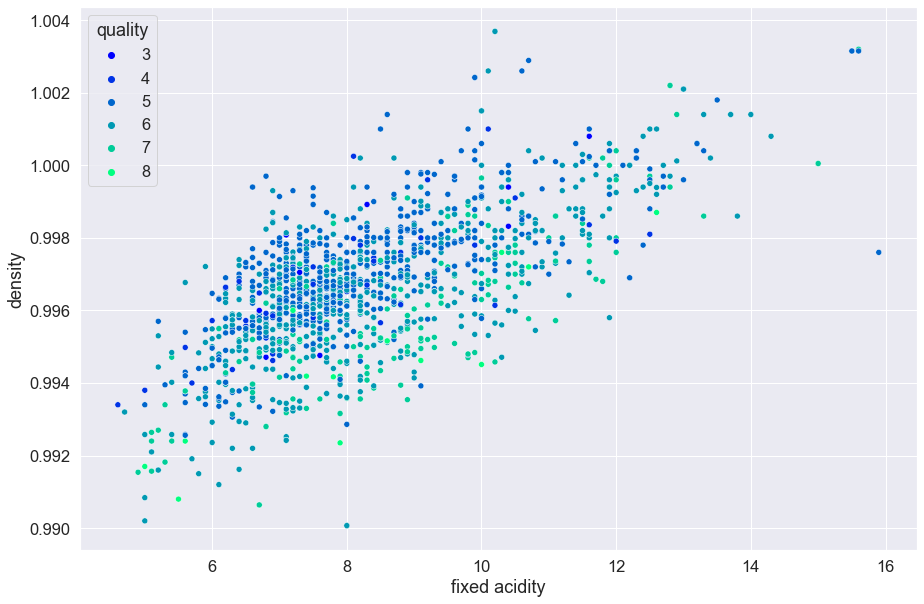

In [13]:
#Bivariate Relationship between 'fixed acidity' and 'density'
fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.scatterplot(data = wine_data, x=wine_data['fixed acidity'], y=wine_data['density'], hue= 'quality', palette='winter')

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

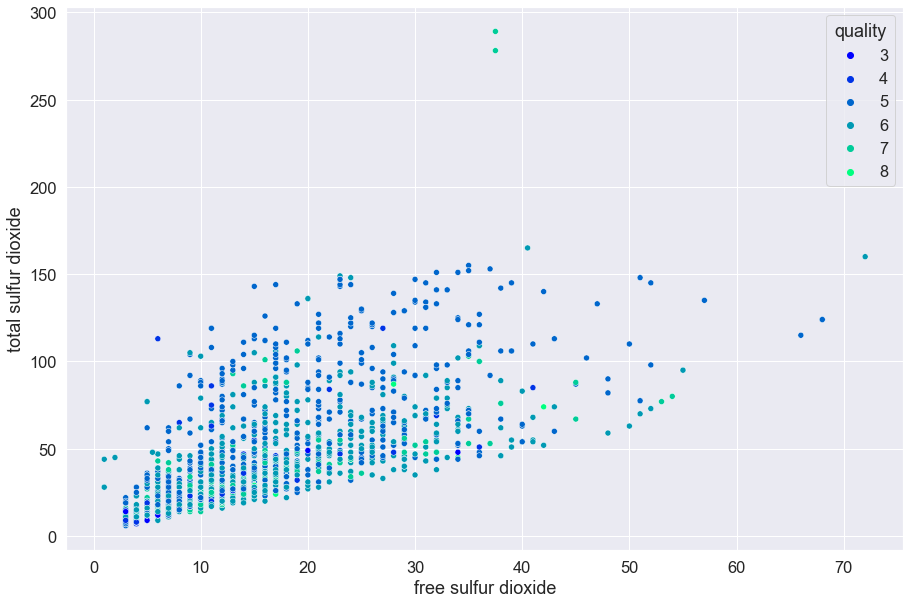

In [14]:
#Bivariate Relationship between 'free sulfur dioxide' and 'total sulfur dioxide'
fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.scatterplot(data = wine_data, x=wine_data['free sulfur dioxide'], y=wine_data['total sulfur dioxide'], hue= 'quality', palette='winter')

<AxesSubplot:xlabel='alcohol', ylabel='density'>

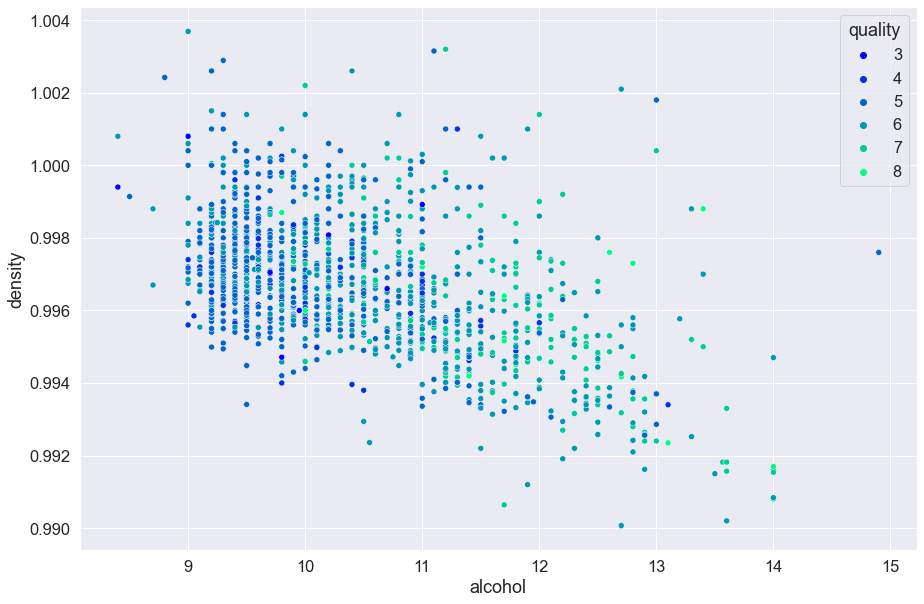

In [15]:
#Bivariate Relationship between 'alcohol' and 'density'
fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.scatterplot(data = wine_data, x=wine_data['alcohol'], y=wine_data['density'], hue= 'quality', palette='winter')

In [16]:
num_cols = wine_data.columns.to_list()
num_cols.remove('quality')
num_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [17]:
tranform_data = wine_data[num_cols]

In [18]:
#Normalising Numerical columns
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
for col in num_cols:
    tranform_data[col] = minmax.fit_transform(tranform_data.values)

In [19]:
tranform_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788
1,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186
2,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186
3,0.584071,0.584071,0.584071,0.584071,0.584071,0.584071,0.584071,0.584071,0.584071,0.584071,0.584071
4,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.141593,0.141593,0.141593,0.141593,0.141593,0.141593,0.141593,0.141593,0.141593,0.141593
1595,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044
1596,0.150442,0.150442,0.150442,0.150442,0.150442,0.150442,0.150442,0.150442,0.150442,0.150442,0.150442
1597,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044


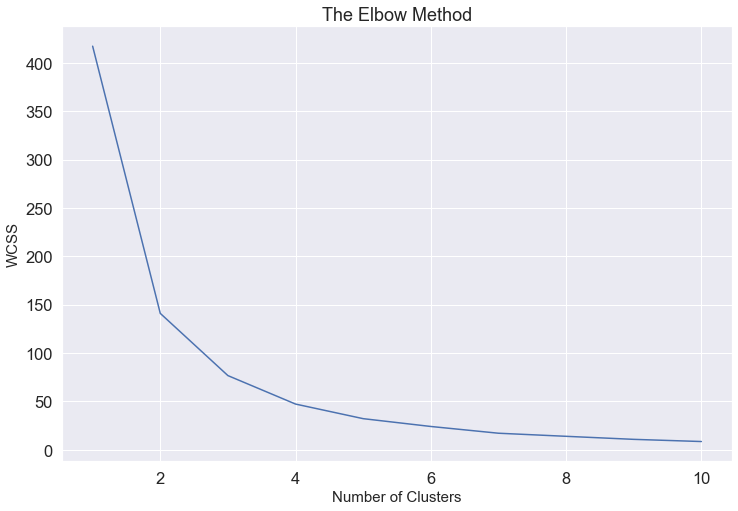

In [20]:
#K-Means Cluster
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(tranform_data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method", fontsize=18)
plt.xlabel("Number of Clusters", fontsize=15)
plt.ylabel("WCSS",fontsize=15)
plt.show()

In [21]:
#Silhoutte Analysis
from sklearn.metrics import silhouette_score
n_clusters = list(range(2,11))
print("Numbers of clusters from 2 to 10:\n", n_clusters)
for clusters in range(2,11):
    clusterer = KMeans(n_clusters=clusters, random_state=0)
    preds = clusterer.fit_predict(tranform_data)
    centres = clusterer.cluster_centers_
    score = silhouette_score(tranform_data,preds,metric='euclidean')
    print("For n clusters = {}, silhoutte score is {}.".format(clusters, score))

Numbers of clusters from 2 to 10:
 [2, 3, 4, 5, 6, 7, 8, 9, 10]
For n clusters = 2, silhoutte score is 0.6172250006691835.
For n clusters = 3, silhoutte score is 0.551269201741731.
For n clusters = 4, silhoutte score is 0.5228267345119758.
For n clusters = 5, silhoutte score is 0.5317808905736592.
For n clusters = 6, silhoutte score is 0.5446094872251263.
For n clusters = 7, silhoutte score is 0.5479596627322266.
For n clusters = 8, silhoutte score is 0.5459097280486477.
For n clusters = 9, silhoutte score is 0.5447298670565265.
For n clusters = 10, silhoutte score is 0.5463571953385151.


In [22]:
#fitting K-means into data
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(tranform_data)

In [23]:
tranform_data['cluster'] = y_kmeans

In [24]:
tranform_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,cluster
0,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0
1,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0
2,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0.283186,0
3,0.584071,0.584071,0.584071,0.584071,0.584071,0.584071,0.584071,0.584071,0.584071,0.584071,0.584071,1
4,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0.247788,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.141593,0.141593,0.141593,0.141593,0.141593,0.141593,0.141593,0.141593,0.141593,0.141593,0
1595,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0
1596,0.150442,0.150442,0.150442,0.150442,0.150442,0.150442,0.150442,0.150442,0.150442,0.150442,0.150442,0
1597,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0.115044,0


<AxesSubplot:>

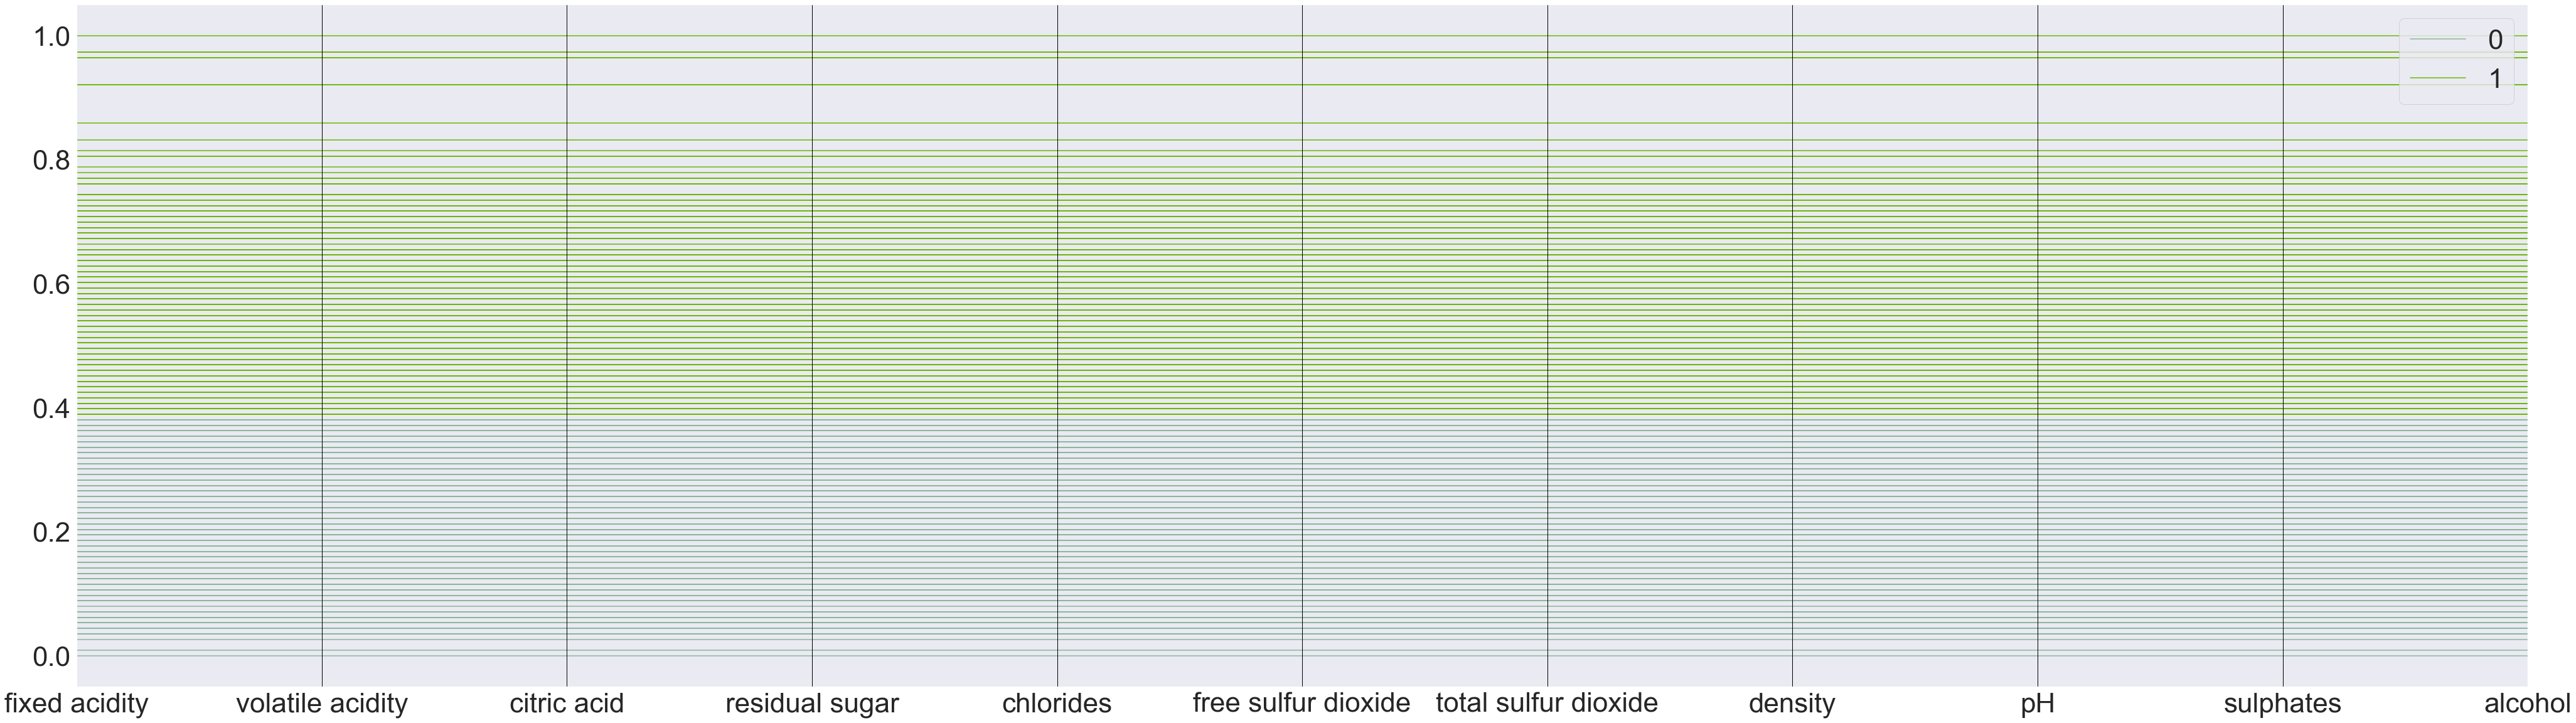

In [25]:
sns.set(font_scale=4)
#sns.color_palette("winter", as_cmap=True)
plt.figure(figsize=(70,20))
pd.plotting.parallel_coordinates(tranform_data,'cluster')

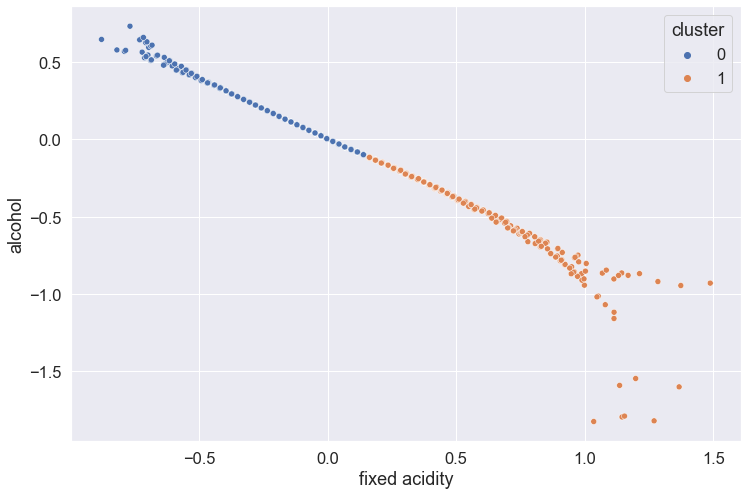

In [26]:
##clustering with ' fixed acidity' and 'alcohol'
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
mds = pd.DataFrame(embedding.fit_transform(tranform_data.drop('cluster',axis=1)),columns=['fixed acidity','alcohol'])
mds['cluster'] = kmeans.predict(tranform_data.drop('cluster',axis=1))
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(data=mds, x='fixed acidity', y='alcohol', hue='cluster')
plt.show()

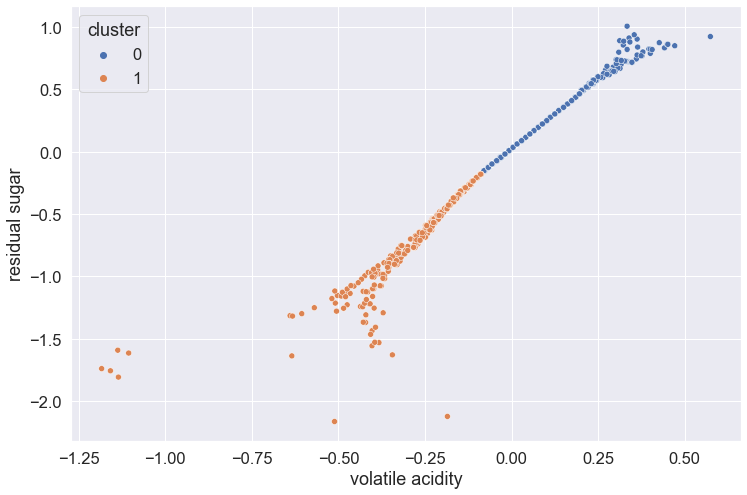

In [27]:
#clustering with 'volatile acidity' and 'residual sugar'
embedding = MDS(n_components=2)
mds = pd.DataFrame(embedding.fit_transform(tranform_data.drop('cluster',axis=1)),columns=['volatile acidity','residual sugar'])
mds['cluster'] = kmeans.predict(tranform_data.drop('cluster',axis=1))
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(data=mds, x='volatile acidity', y='residual sugar', hue='cluster')
plt.show()

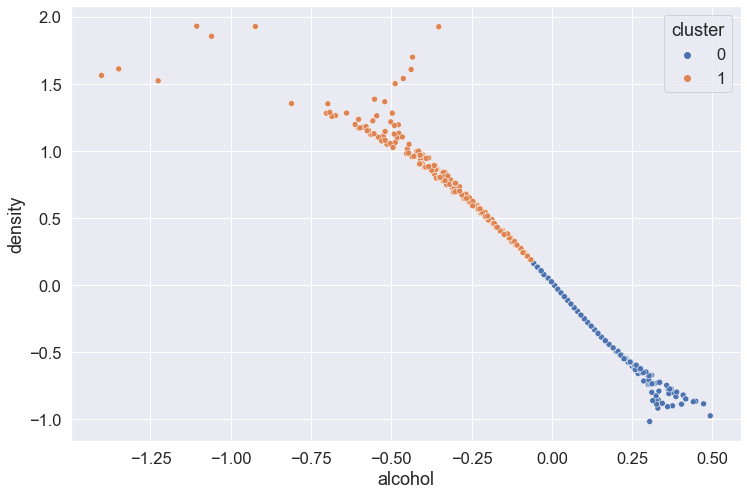

In [28]:
#clustering with 'alcohol' and 'density'
embedding = MDS(n_components=2)
mds = pd.DataFrame(embedding.fit_transform(tranform_data.drop('cluster',axis=1)),columns=['alcohol','density'])
mds['cluster'] = kmeans.predict(tranform_data.drop('cluster',axis=1))
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(data=mds, x='alcohol', y='density', hue='cluster')
plt.show()

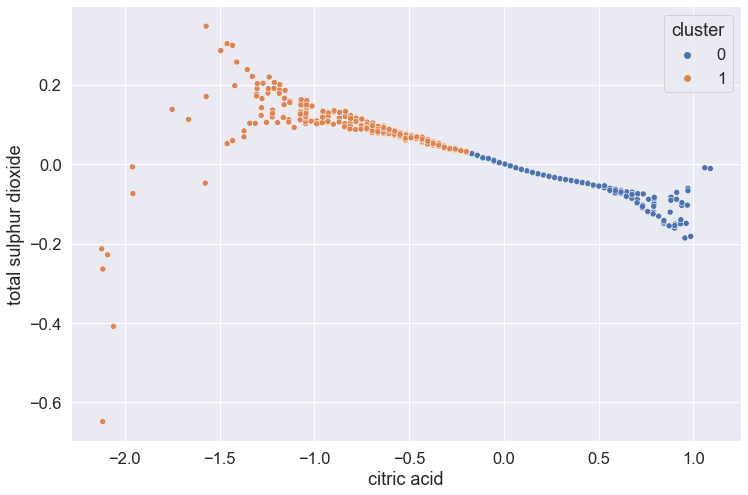

In [29]:
#clustering with 'citric acid' and 'total sulphur dioxide'
embedding = MDS(n_components=2)
mds = pd.DataFrame(embedding.fit_transform(tranform_data.drop('cluster',axis=1)),columns=['citric acid','total sulphur dioxide'])
mds['cluster'] = kmeans.predict(tranform_data.drop('cluster',axis=1))
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(data=mds, x='citric acid', y='total sulphur dioxide', hue='cluster')
plt.show()

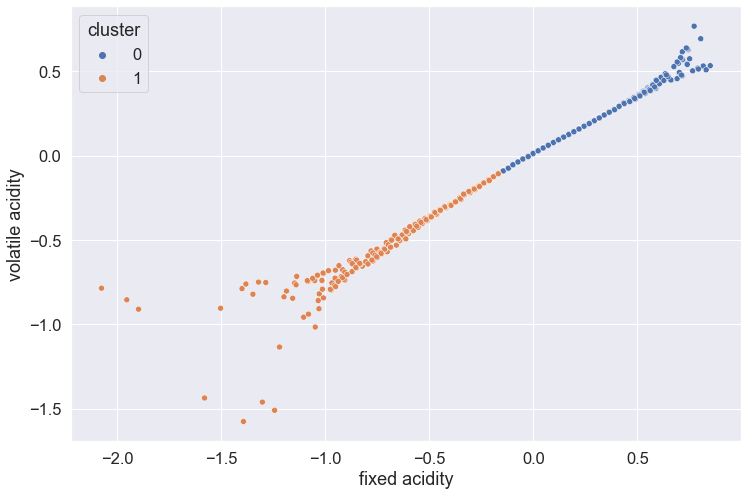

In [30]:
#clustering with 'fixed acidity' and 'volatile acidity'
embedding = MDS(n_components=2)
mds = pd.DataFrame(embedding.fit_transform(tranform_data.drop('cluster',axis=1)),columns=['fixed acidity','volatile acidity'])
mds['cluster'] = kmeans.predict(tranform_data.drop('cluster',axis=1))
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(data=mds, x='fixed acidity', y='volatile acidity', hue='cluster')
plt.show()

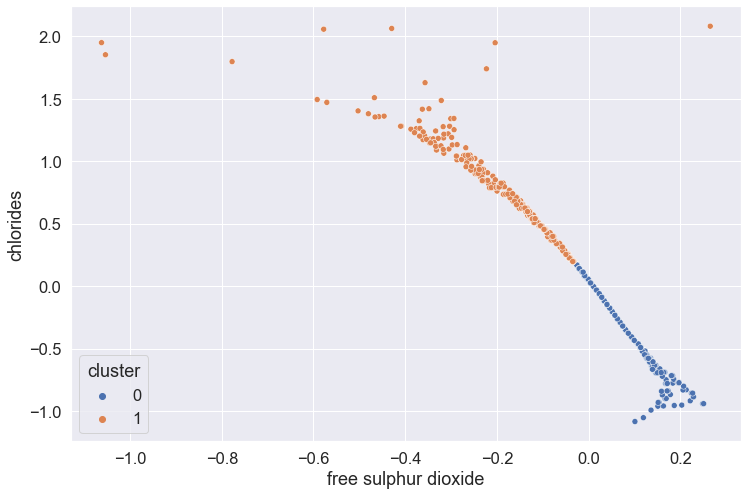

In [31]:
#clustering with 'free sulphur dioxide' and 'chlorides'
embedding = MDS(n_components=2)
mds = pd.DataFrame(embedding.fit_transform(tranform_data.drop('cluster',axis=1)),columns=['free sulphur dioxide','chlorides'])
mds['cluster'] = kmeans.predict(tranform_data.drop('cluster',axis=1))
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(data=mds, x='free sulphur dioxide', y='chlorides', hue='cluster')
plt.show()

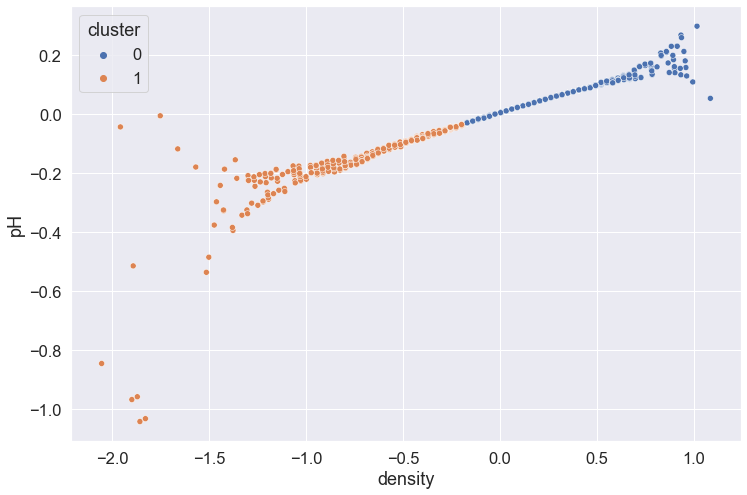

In [32]:
#clustering with 'density' and 'pH'
embedding = MDS(n_components=2)
mds = pd.DataFrame(embedding.fit_transform(tranform_data.drop('cluster',axis=1)),columns=['density','pH'])
mds['cluster'] = kmeans.predict(tranform_data.drop('cluster',axis=1))
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(data=mds, x='density', y='pH', hue='cluster')
plt.show()

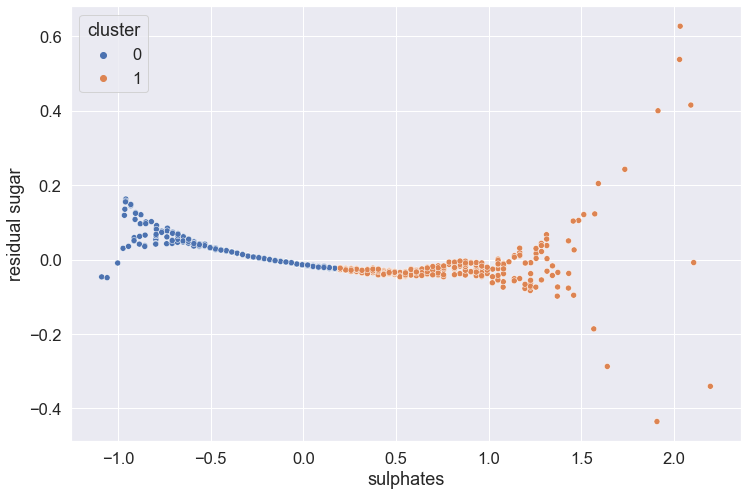

In [33]:
#clustering with 'sulphates' and 'residual sugar'
embedding = MDS(n_components=2)
mds1 = pd.DataFrame(embedding.fit_transform(tranform_data.drop('cluster',axis=1)),columns=['sulphates','residual sugar'])
mds1['cluster'] = kmeans.predict(tranform_data.drop('cluster',axis=1))
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(data=mds1, x='sulphates', y='residual sugar', hue='cluster')
#sns.scatterplot(data=mds1, x='sulphates', y='residual sugar', hue='cluster')
plt.show()

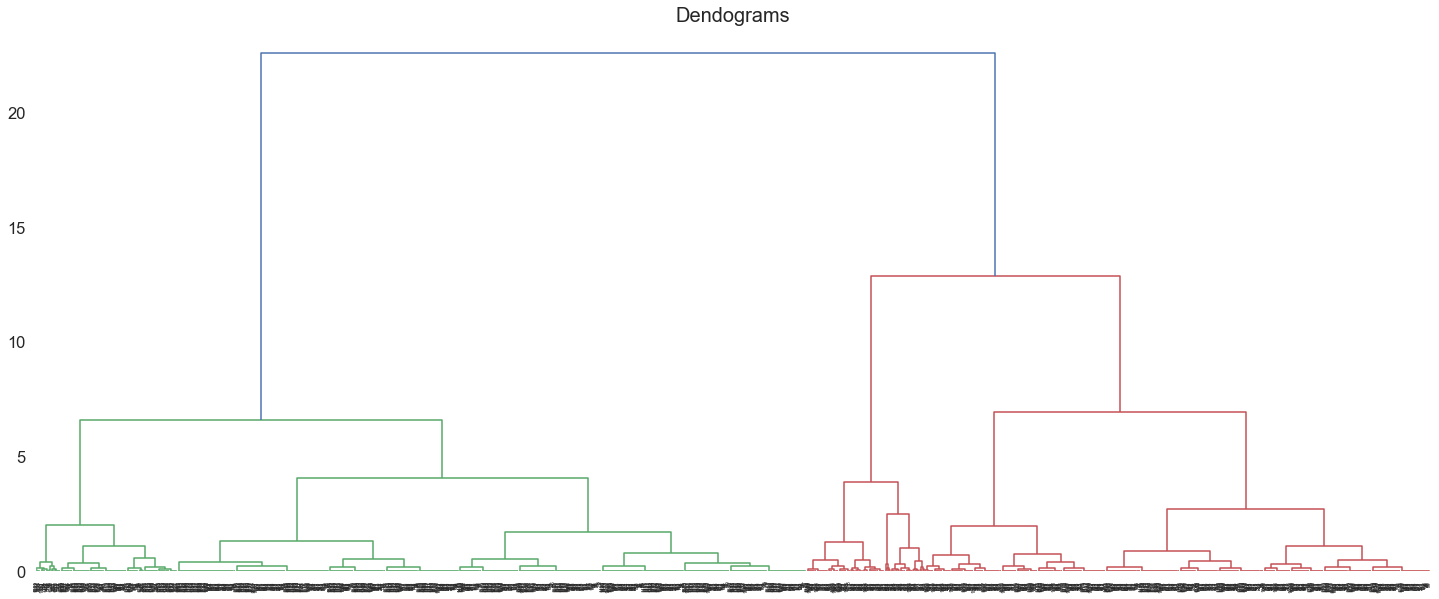

In [34]:
#plotting dendograms
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(25,10))
plt.title("Dendograms",fontsize=20)
dend = shc.dendrogram(shc.linkage(tranform_data.drop('cluster',axis=1),method='ward'))

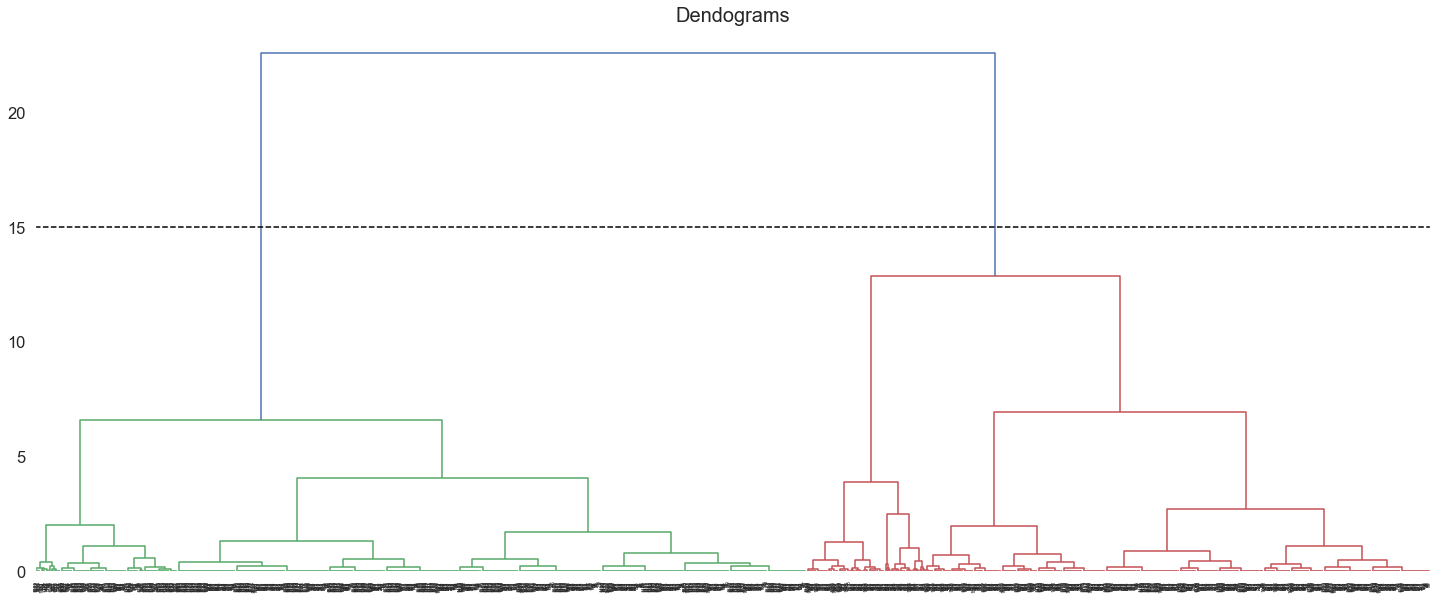

In [35]:
plt.figure(figsize=(25,10))
plt.title("Dendograms",fontsize=20)
dend = shc.dendrogram(shc.linkage(tranform_data.drop('cluster',axis=1),method='ward'))
plt.axhline(y=15,color='black',linestyle='--')
plt.show()

In [36]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

In [37]:
embedding = MDS(n_components=2)
mds2 = pd.DataFrame(embedding.fit_transform(tranform_data.drop('cluster',axis=1)),columns=['sulphates','residual sugar'])

Agg_Clust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="ward")
mds2['cluster'] = Agg_Clust.fit_predict(tranform_data.drop('cluster', axis=1))

mds2

,sulphates,residual sugar,cluster
0,0.007849,-0.269579,1
1,0.005247,-0.152170,1
2,0.005265,-0.152170,1
3,-0.004734,0.845997,0
4,0.007960,-0.269577,1
...,...,...,...
1594,0.007959,-0.621924,1
1595,0.000686,-0.710000,1
1596,0.003513,-0.592558,1
1597,0.017168,-0.709868,1


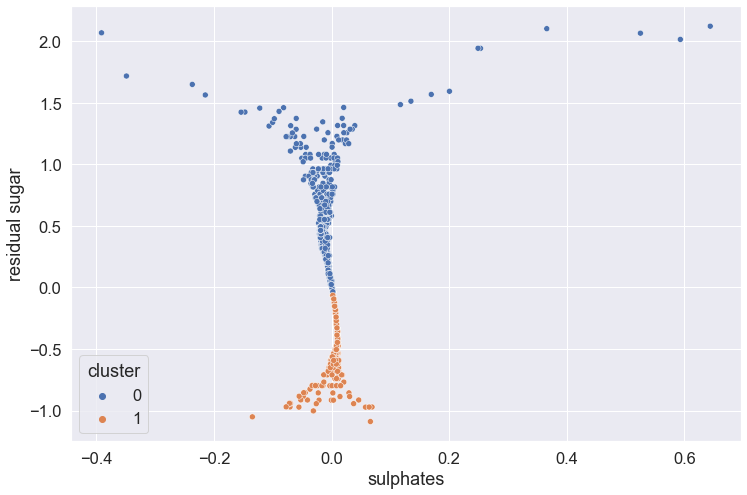

In [38]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(data=mds2, x='sulphates', y='residual sugar', hue='cluster')
#sns.scatterplot(data=mds2, x='sulphates', y='residual sugar', hue='cluster')
plt.show()

K-Means Clustering


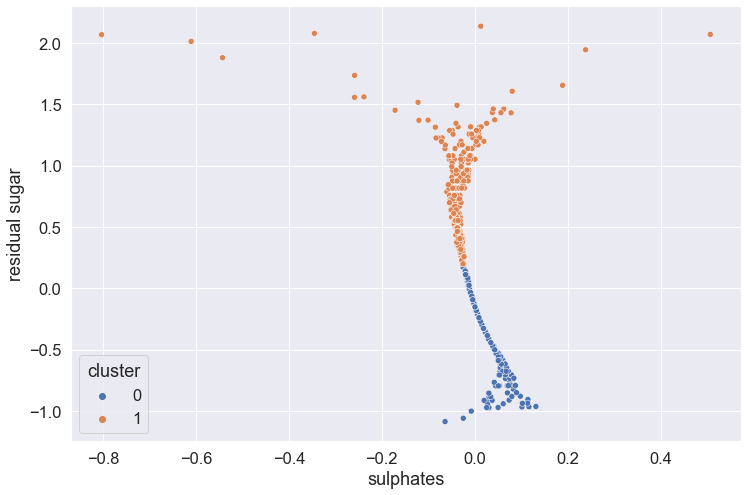

Agglomerative Clustering


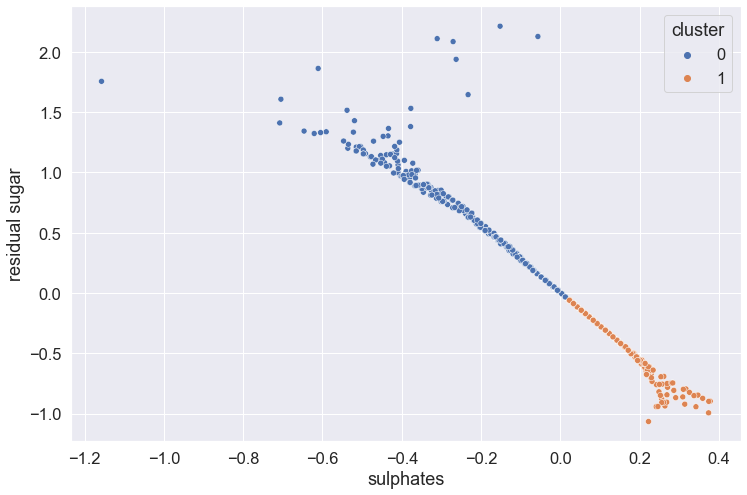

In [39]:
#Visualising clusters

#plt.subplot(2,1,1)
print("K-Means Clustering")
embedding = MDS(n_components=2)
mds1 = pd.DataFrame(embedding.fit_transform(tranform_data.drop('cluster',axis=1)),columns=['sulphates','residual sugar'])
mds1['cluster'] = kmeans.predict(tranform_data.drop('cluster',axis=1))
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(data=mds1, x='sulphates', y='residual sugar', hue='cluster')
#sns.scatterplot(data=mds1, x='sulphates', y='residual sugar', hue='cluster')
plt.show()

#plt.subplot(2,1,1)
print("Agglomerative Clustering")
embedding = MDS(n_components=2)
mds2 = pd.DataFrame(embedding.fit_transform(tranform_data.drop('cluster',axis=1)),columns=['sulphates','residual sugar'])
Agg_Clust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="ward")
mds2['cluster'] = Agg_Clust.fit_predict(tranform_data.drop('cluster', axis=1))
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(data=mds2, x='sulphates', y='residual sugar', hue='cluster')
#sns.scatterplot(data=mds2, x='sulphates', y='residual sugar', hue='cluster')
plt.show()